<a href="https://colab.research.google.com/github/JagjeetChauhan/Machine-Learning-Projects/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving digits.zip to digits.zip


In [ ]:
import zipfile
import os

for filename in uploaded.keys():
  with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content')

# List files in the extracted folder
os.listdir('/content')

# Verify the extraction by listing the files
os.listdir('/content/digits')

['digit5.png',
 'digit9.png',
 'digit4.png',
 'digit6.png',
 'digit7.png',
 'digit1.png',
 'digit10.png',
 'digit2.png',
 'digit3.png',
 'digit8.png']

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

model.save('HandWritten.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8719 - loss: 0.4591
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9674 - loss: 0.1076
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9779 - loss: 0.0672
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9848 - loss: 0.0470
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - loss: 0.0335
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0224
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9946 - loss: 0.0175
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9959 - loss: 0.0132
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9956 - loss: 0.0133


In [ ]:
model = tf.keras.models.load_model('HandWritten.keras')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.1224
0.11276482045650482
0.9747999906539917


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
This digit is probably a 3


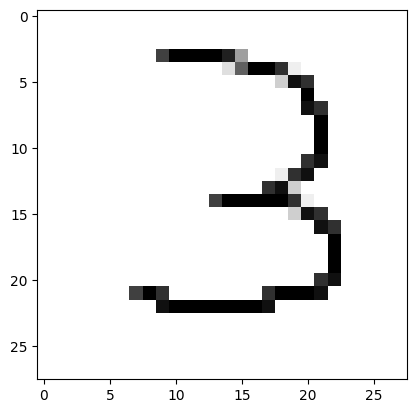

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This digit is probably a 9


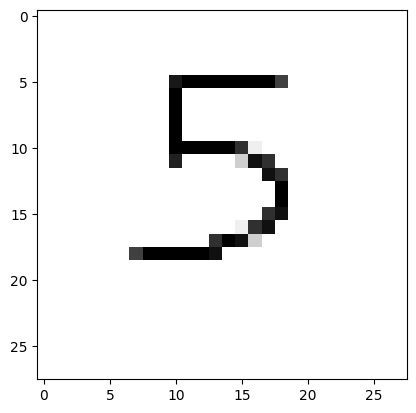

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 4


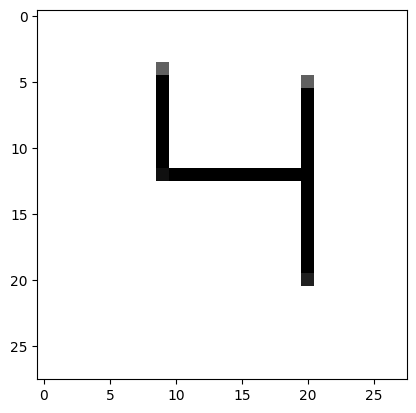

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digit is probably a 4


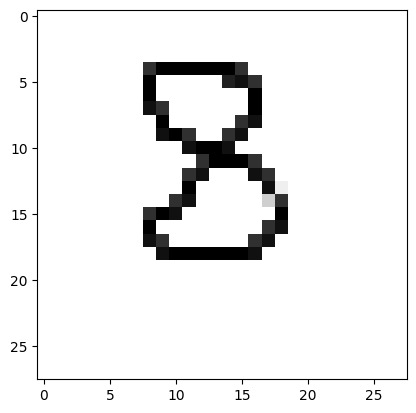

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This digit is probably a 2


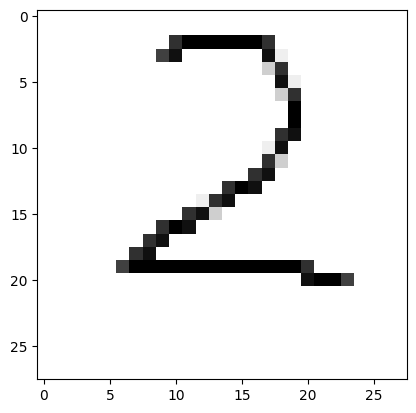

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 2


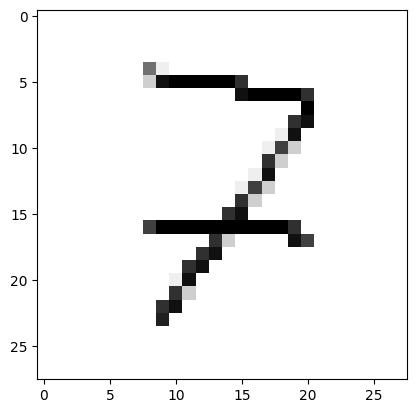

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This digit is probably a 2


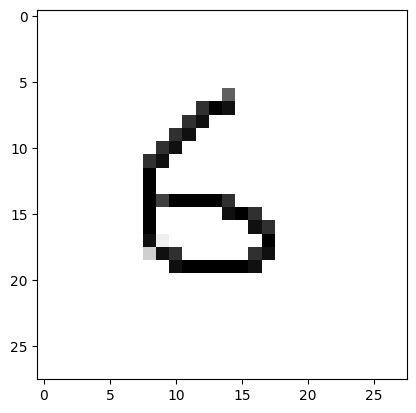

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 7


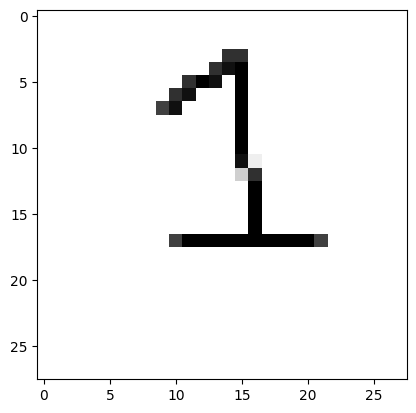

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This digit is probably a 0


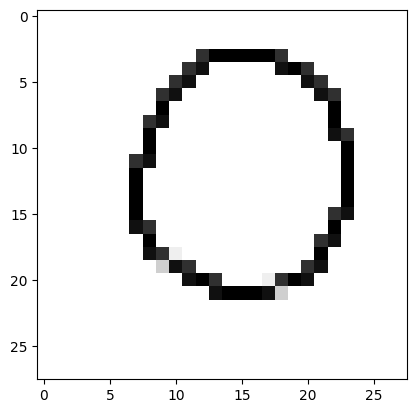

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digit is probably a 4


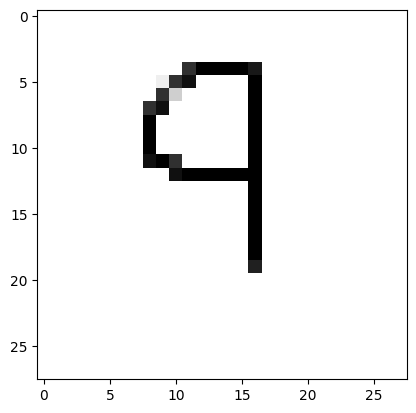

In [ ]:
image_number = 1
while os.path.isfile(f'/content/digits/digit{image_number}.png'):
  img = cv2.imread(f'/content/digits/digit{image_number}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This digit is probably a {np.argmax(prediction)}')
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()
  image_number += 1